<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Tarea_de_minimos_cuadrados_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MÉTODO DE MÍNIMOS CUADRADOS

Resolver el problema de valor inicial

$$u'' +u= x \qquad u(0)=0, \qquad u'(0)=2 $$
Buacaremos una solución aproximada usando el método de mínimos cuadrados, empleando la fución de prueba de la forma:

$$
u_N(x)=\alpha_0+\alpha_1 x+\alpha_2 x^2+\alpha_3 x^3.
$$

Por otro lado usando las condiciones iniciales para determinar los coeficientes $\alpha_0$ y $α_1$ y además compararemos la solución númerica con la analitica (exacta) y finalmente calcularemos el error de la aproximación.

En este ejercicio aplicamos el método de mínimos cuadrados para obtener una solución aproximada del problema de valor inicial.

$$u'' + u = x, \qquad u(0)=0, \quad u'(0)=2.
$$

A diferencia de los problemas de frontera, aquí usamos una función de prueba polinomial:

$$u_N(x)=\alpha_0+\alpha_1 x+\alpha_2 x^2+\alpha_3 x^3.
$$

Las condiciones iniciales permiten fijar:

$$
\alpha_0 = 0, \qquad \alpha_1 = 2.
$$

Por lo tanto los parametros desconocidos son: $\alpha_2,\quad \alpha_3.$

Ele métodod de mínimos cuadrados consiste en minimizar la integral del residuo al cuadrado:

$$ I(\alpha_2,\alpha_3)=\int_0^1 \left( u_N''(x)+u_N(x)-x \right)^2 dx.
$$


Para encontrar el mínimo resolveremos:

$$
\frac{\partial I}{\partial \alpha_2}=0, \qquad
\frac{\partial I}{\partial \alpha_3}=0.
$$

Fimalmente, compararemos la solución aproximada con la solución exacta y calculamos el error.




In [2]:
#importamos librerias

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Definimos la variable simbólica y función
x=sp.symbols('x')
a,b = sp.symbols('a b') #son los aplha siendo los coeficientes desconocidos
u= sp.Function('u')

In [4]:
#Ecuación diferencial u''+u -x =0
ode = u(x).diff(x,x)+u(x)-x
sp.dsolve(ode,u(x))  #resuelve la ecuación

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [5]:
#resolver con las condiciones iniciales
sol_exact = sp.dsolve(ode, ics={u(0):0 , sp.diff(u(x),x).subs(x,0):2})

In [6]:
print("Solución exacta simbólica:")
sol_exact #muestra la solución exacta

Solución exacta simbólica:


Eq(u(x), x + sin(x))

In [7]:
#convertimos la solución simbolica a función numérica
u_exact_expr = sol_exact.rhs # # parte derecha (right-hand side) de solucion

u_exact = sp.lambdify(x,u_exact_expr, "numpy")


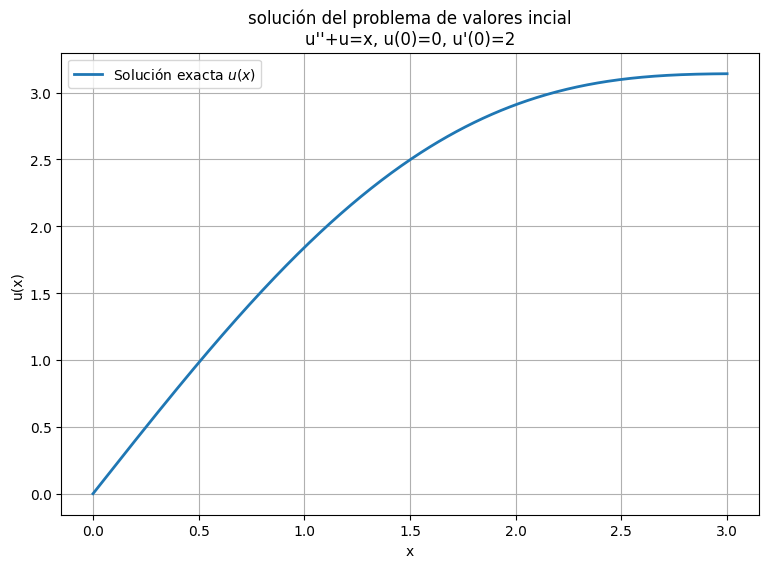

In [8]:
#malla para graficar
xx= np.linspace(0,3,500)
yy= u_exact(xx)

#Grafica
plt.figure(figsize=(9,6))
plt.plot(xx,yy, label = "Solución exacta $u(x)$", linewidth=2)
plt.title("solución del problema de valores incial\nu''+u=x, u(0)=0, u'(0)=2")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

##SOLUCIÓN NÚMERICA

In [9]:

#definimos la función de prueba u_n(x) que cumple u(0)=u(1)=0
#Polinomio cúbico que ya cumple las condiciones iniciales
u_N= 2*x + a*x**2 + b*x**3


print("\nFunción de prueba (polinomio cúbico):")
u_N




Función de prueba (polinomio cúbico):


a*x**2 + b*x**3 + 2*x

Definimos el residuo o error E

In [10]:
u_N_2= sp.diff(u_N, x ,2) #calculo de la segunda derivada
u_N_2

2*(a + 3*b*x)

In [11]:
#E(x)
E= u_N_2 + u_N -x

print("\nResiduo E(x):")
E


Residuo E(x):


a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [12]:
E.simplify()

a*x**2 + 2*a + b*x**3 + 6*b*x + x

Imponemos las condiciones para obtener los puntos criticos del residuo:

$$\frac{\partial}{\partial a} ∫_0^1 E^2 dx= 0$$

$$\frac{\partial}{\partial b} ∫_0^1 E^2 dx= 0$$

Y resolvemos el sistema de ecuaciones resultantes

In [13]:
#Integral del cuadrado del residual del intervalo de [0,1]
I = sp.integrate( E**2, (x,0,1))
I

83*a**2/15 + 49*a*b/3 + 5*a/2 + 509*b**2/35 + 22*b/5 + 1/3

In [14]:
dIa = sp.diff(I,a)
dIb= sp.diff(I,b)

In [15]:
#otra forma de

print("∂I/∂a =", dIa)
print("∂I/∂b =", dIb)


∂I/∂a = 166*a/15 + 49*b/3 + 5/2
∂I/∂b = 49*a/3 + 1018*b/35 + 22/5


In [16]:
#para igualar a 0
soleq = sp.solve ([dIa, dIb], [a,b], simplify=True)
print("\nSolución del sistema (para conocer a y b):")

soleq


Solución del sistema (para conocer a y b):


{a: -1335/86789, b: -24759/173578}

In [17]:
#sustituir en la función de prueba
u_approx = E.subs (soleq)

print("Solución aproximada (polinomio cúbico):")
u_approx

Solución aproximada (polinomio cúbico):


-24759*x**3/173578 - 1335*x**2/86789 + 12512*x/86789 - 2670/86789

In [18]:
u_approx_fn =sp.lambdify(x,u_approx, "numpy")

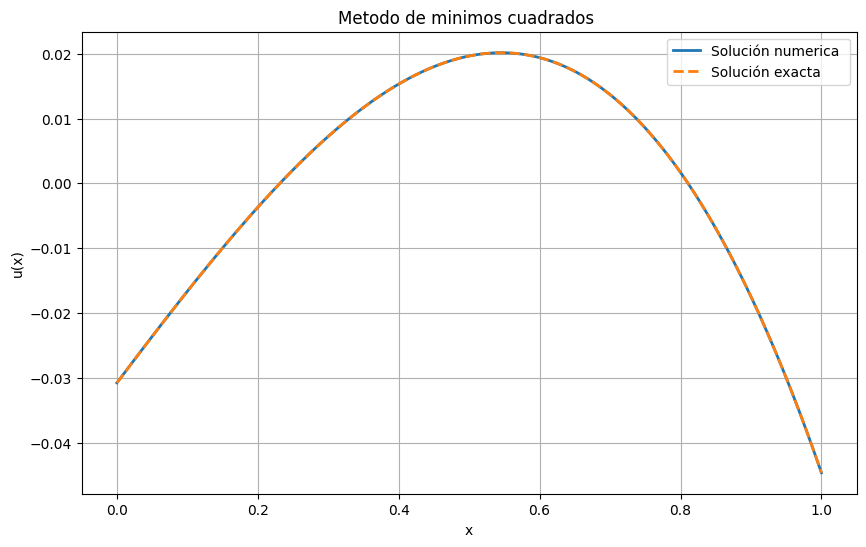

In [19]:
xx= np.linspace(0,1,500)

yy = u_approx_fn(xx)

plt.figure(figsize=(10,6))
plt.plot(xx, u_approx_fn(xx) , label = "Solución numerica ", linewidth=2)
plt.plot(xx, yy,"--", label = "Solución exacta", linewidth=2) #-- tipo de linea punteada

plt.title("Metodo de minimos cuadrados ")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Error punto a punto
error = np.abs(u_exact(xx) - u_approx_fn(xx))

print("Error máximo punto a punto:", error)


Error máximo punto a punto: [0.03076427 0.03448344 0.03820273 0.04192214 0.04564167 0.04936132
 0.05308109 0.05680098 0.06052098 0.06424109 0.06796132 0.07168166
 0.07540211 0.07912267 0.08284334 0.08656412 0.090285   0.09400599
 0.09772708 0.10144827 0.10516957 0.10889096 0.11261246 0.11633405
 0.12005574 0.12377753 0.12749941 0.13122138 0.13494345 0.13866561
 0.14238785 0.14611019 0.14983261 0.15355512 0.15727772 0.1610004
 0.16472317 0.16844601 0.17216894 0.17589194 0.17961503 0.18333819
 0.18706143 0.19078474 0.19450813 0.19823159 0.20195513 0.20567873
 0.2094024  0.21312615 0.21684995 0.22057383 0.22429777 0.22802177
 0.23174584 0.23546997 0.23919416 0.24291841 0.24664272 0.25036708
 0.2540915  0.25781598 0.26154051 0.26526509 0.26898973 0.27271441
 0.27643915 0.28016393 0.28388876 0.28761364 0.29133856 0.29506353
 0.29878854 0.30251359 0.30623868 0.30996382 0.31368899 0.3174142
 0.32113944 0.32486473 0.32859004 0.33231539 0.33604077 0.33976619
 0.34349163 0.3472171  0.3509426  0.

In [24]:
error_max = np.max(error)
print("Error máximo ||e||∞:", error_max)

Error máximo ||e||∞: 1.886090694678963


In [25]:
error_L2 = np.sqrt(np.trapz(error**2, xx))
print("Error cuadrático ||e||₂:", error_L2)


Error cuadrático ||e||₂: 1.0985842141670514


/tmp/ipython-input-1048135088.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  error_L2 = np.sqrt(np.trapz(error**2, xx))
